##ANALISE DE SILUETA

K=2: Score = 0.2137
K=3: Score = 0.1892
K=4: Score = 0.1716
K=5: Score = 0.1901
K=6: Score = 0.1947
K=7: Score = 0.1926
K=8: Score = 0.1495
K=9: Score = 0.1534
K=10: Score = 0.1574


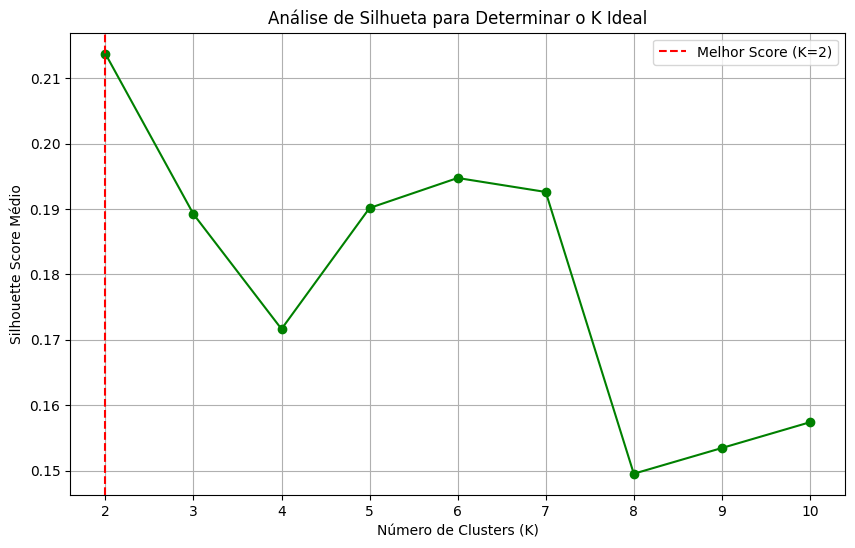

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

file_name = "winequality-red.csv"
df = pd.read_csv(file_name)
X = df.drop('quality', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Score = {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Análise de Silhueta para Determinar o K Ideal')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score Médio')
plt.xticks(k_range)
plt.grid(True)

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Melhor Score (K={best_k})')

plt.legend()
plt.show()

##CLUSTERS

--- Executando K-Means com K=2 ---

1. Número de Elementos por Cluster:
Cluster
0     590
1    1009
Name: count, dtype: int64
------------------------------


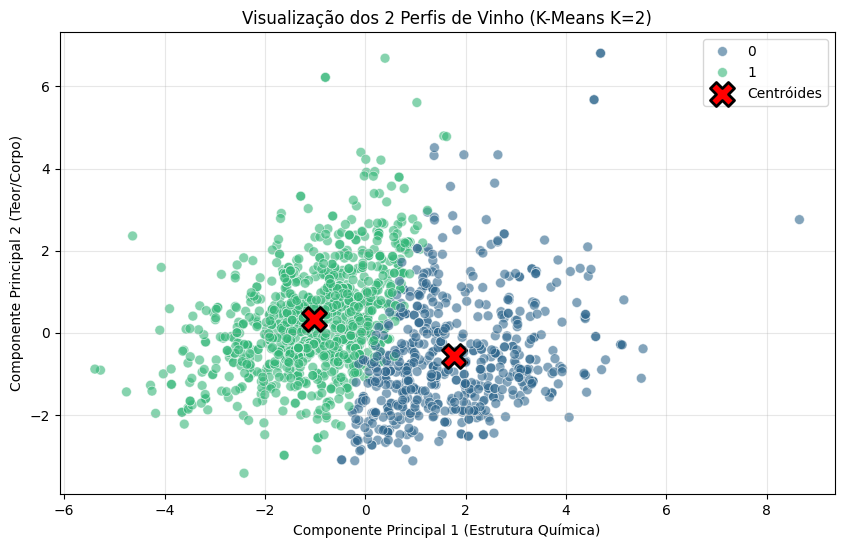


2. Perfil Médio (Centróides Reais) de cada Cluster:
           alcohol  volatile acidity  sulphates   quality  citric acid
Cluster                                                               
0        10.607401          0.413907   0.748237  5.894915     0.462881
1        10.315147          0.594430   0.605471  5.484638     0.158761
------------------------------

3. Interpretação da Associação (Regras Implícitas):
-> O Cluster 0 tende a ter:
   - Maior teor alcoólico (Média: 10.61%)
   - Menor acidez volátil (Média: 0.41) (Menos gosto de vinagre)
   = Isso resulta em uma NOTA DE QUALIDADE MÉDIA MAIOR (5.89)

-> O Cluster 1 tende a ter:
   - Menor teor alcoólico (Média: 10.32%)
   - Maior acidez volátil (Média: 0.59)
   = Isso resulta em uma NOTA DE QUALIDADE MÉDIA MENOR (5.48)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df_analise = df.copy()
df_analise['Cluster'] = cluster_labels

contagem = df_analise['Cluster'].value_counts().sort_index()
print("\n1. Número de Elementos por Cluster:")
print(contagem)
print("-" * 30)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centroids_pca = pca.transform(kmeans.cluster_centers_)

df_plot = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_plot,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis',
    s=50,
    alpha=0.6
)

plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    s=300, c='red', marker='X', edgecolors='black', linewidth=2,
    label='Centróides'
)

plt.title('Visualização dos 2 Perfis de Vinho (K-Means K=2)')
plt.xlabel('Componente Principal 1 (Estrutura Química)')
plt.ylabel('Componente Principal 2 (Teor/Corpo)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n2. Perfil Médio (Centróides Reais) de cada Cluster:")
colunas_chave = ['alcohol', 'volatile acidity', 'sulphates', 'quality', 'citric acid']
perfil_medio = df_analise.groupby('Cluster')[colunas_chave].mean()
print(perfil_medio)

print("-" * 30)
print("\n3. Interpretação da Associação (Regras Implícitas):")

cluster_alta_qualidade = perfil_medio['quality'].idxmax()
cluster_baixa_qualidade = perfil_medio['quality'].idxmin()

print(f"-> O Cluster {cluster_alta_qualidade} tende a ter:")
print(f"   - Maior teor alcoólico (Média: {perfil_medio.loc[cluster_alta_qualidade, 'alcohol']:.2f}%)")
print(f"   - Menor acidez volátil (Média: {perfil_medio.loc[cluster_alta_qualidade, 'volatile acidity']:.2f}) (Menos gosto de vinagre)")
print(f"   = Isso resulta em uma NOTA DE QUALIDADE MÉDIA MAIOR ({perfil_medio.loc[cluster_alta_qualidade, 'quality']:.2f})")

print(f"\n-> O Cluster {cluster_baixa_qualidade} tende a ter:")
print(f"   - Menor teor alcoólico (Média: {perfil_medio.loc[cluster_baixa_qualidade, 'alcohol']:.2f}%)")
print(f"   - Maior acidez volátil (Média: {perfil_medio.loc[cluster_baixa_qualidade, 'volatile acidity']:.2f})")
print(f"   = Isso resulta em uma NOTA DE QUALIDADE MÉDIA MENOR ({perfil_medio.loc[cluster_baixa_qualidade, 'quality']:.2f})")

##ASSOCIAÇÕES

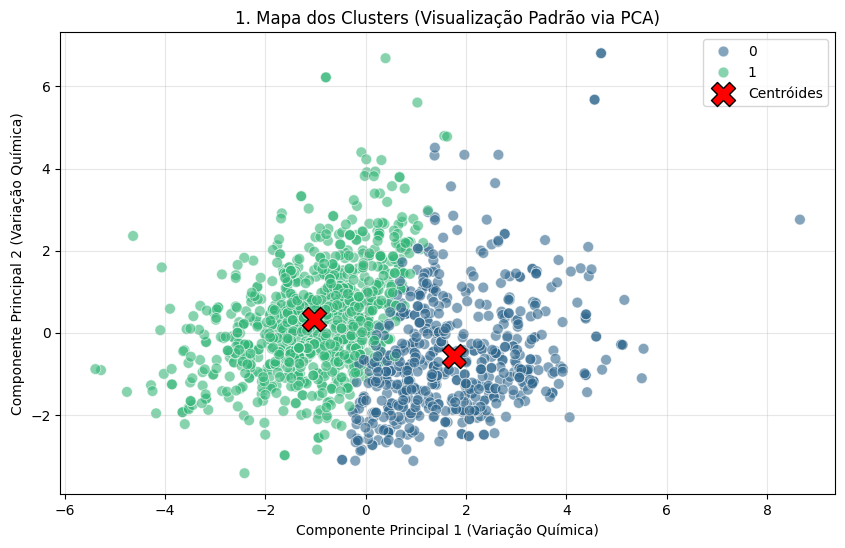

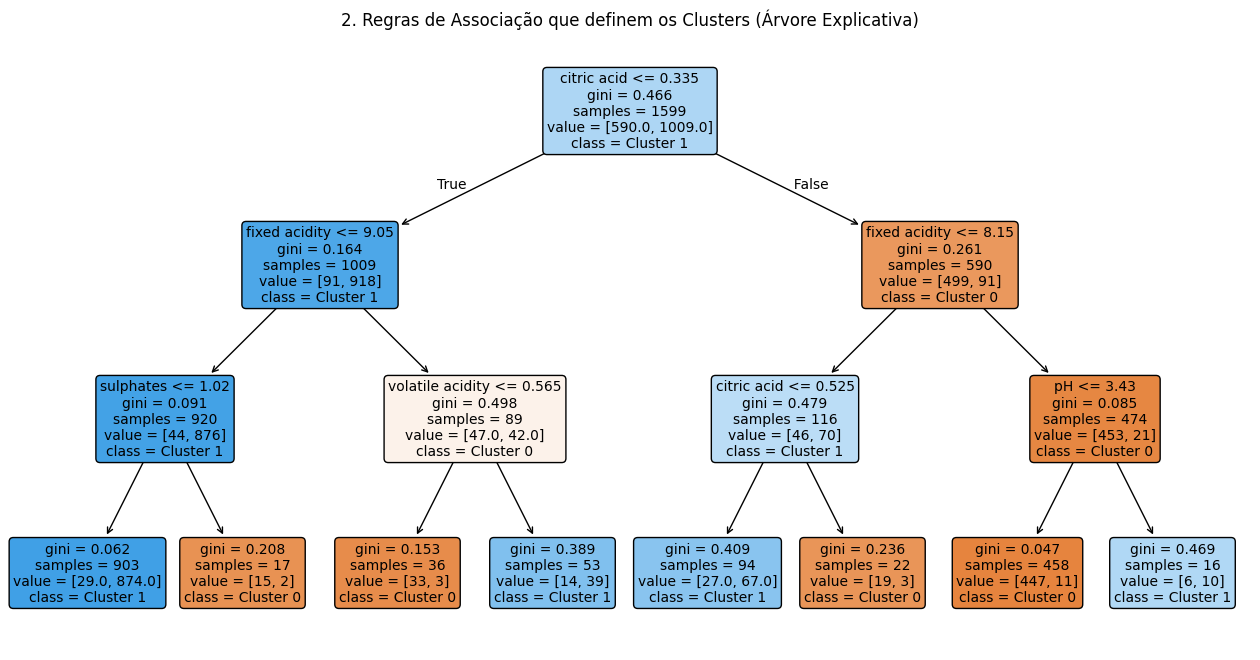

/tmp/ipython-input-1407184260.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='alcohol', data=df, ax=axes[0], palette="viridis")
/tmp/ipython-input-1407184260.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='volatile acidity', data=df, ax=axes[1], palette="viridis")


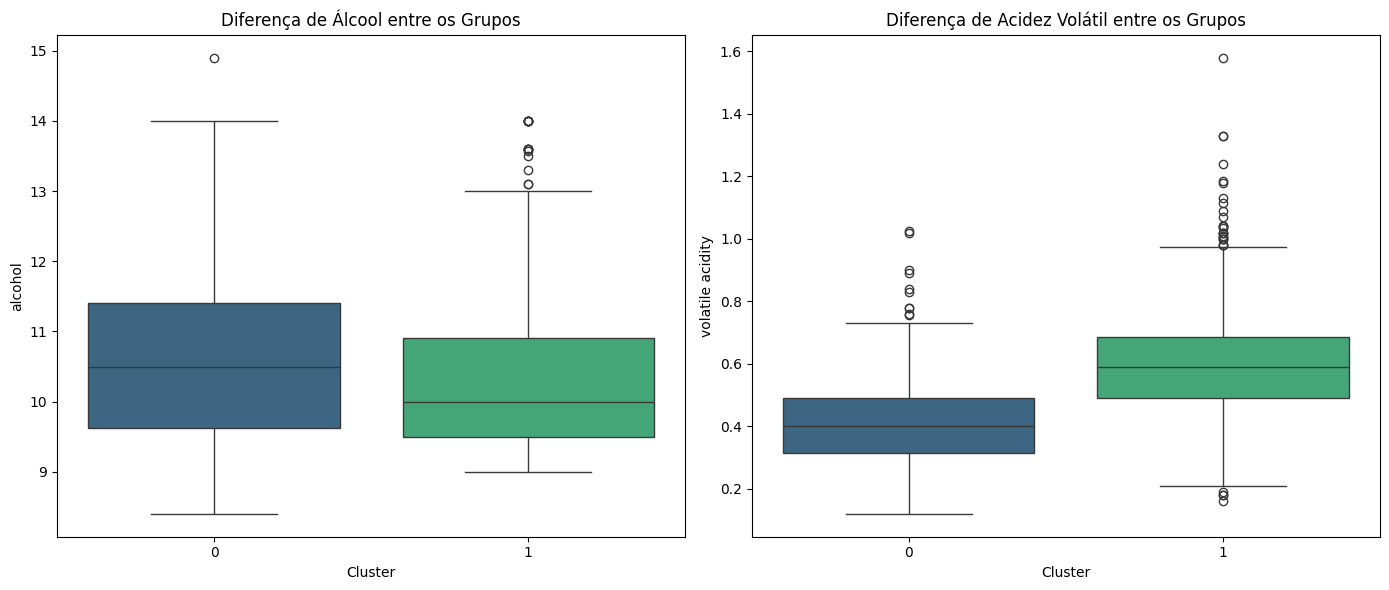

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree

file_name = "winequality-red.csv"
df = pd.read_csv(file_name)
X = df.drop('quality', axis=1)
feature_names = X.columns.tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = cluster_labels
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=60, alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', edgecolors='black', label='Centróides')

plt.title('1. Mapa dos Clusters (Visualização Padrão via PCA)')
plt.xlabel('Componente Principal 1 (Variação Química)')
plt.ylabel('Componente Principal 2 (Variação Química)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

clf_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_tree.fit(X, cluster_labels)

plt.figure(figsize=(16, 8))
plot_tree(clf_tree,
          feature_names=feature_names,
          class_names=['Cluster 0', 'Cluster 1'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title('2. Regras de Associação que definem os Clusters (Árvore Explicativa)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Cluster', y='alcohol', data=df, ax=axes[0], palette="viridis")
axes[0].set_title('Diferença de Álcool entre os Grupos')

sns.boxplot(x='Cluster', y='volatile acidity', data=df, ax=axes[1], palette="viridis")
axes[1].set_title('Diferença de Acidez Volátil entre os Grupos')

plt.tight_layout()
plt.show()